In [29]:
samples = ! ls ZH/*_test_bdt.csv

In [30]:
print(samples)

['ZH/cHW-003_test_bdt.csv', 'ZH/cHW+003_test_bdt.csv', 'ZH/SM_test_bdt.csv', 'ZH/Zbb_test_bdt.csv']


In [31]:
Zbb = pd.read_csv(samples[-1])
SMVh = pd.read_csv(samples[-2])
cHWp = pd.read_csv(samples[-3])
cHWm = pd.read_csv(samples[-4])

In [95]:
def bkg_reject(Zbb,SMVh,column):
    
    plt.figure(figsize=(6,4))
    Zbb_prob_bkg, bins, _ = plt.hist(Zbb[column],bins=50,range=[0,1],weights=Zbb.wgt,normed=True,label='Zbb',cumulative=True)
    SMVh_prob_bkg, bins, _ = plt.hist(SMVh[column],bins=bins,weights=SMVh.wgt,normed=True,alpha=0.5,label='SM ZH',cumulative=True)
    plt.xlabel('p(SM ZH)')
    plt.ylabel('A.U.')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(1-SMVh_prob0,Zbb_prob0)
    plt.xlabel('$\\varepsilon(SM ZH)$')
    plt.ylabel('$1-\\varepsilon(Zbb)$')
    plt.grid()
    
    plt.subplot(1,2,2)
    plt.plot(bins[1:],(1-SMVh_prob0)**2/(1-Zbb_prob0))
    plt.ylabel('$S^2 / B$')
    plt.xlabel('p(SM ZH)')
    plt.grid()
    plt.show()
    
    return Zbb_prob0, SMVh_prob0, bins

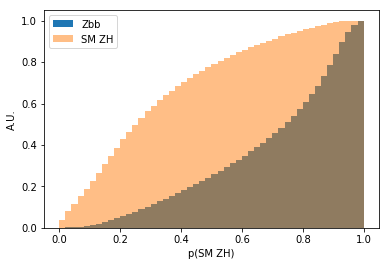

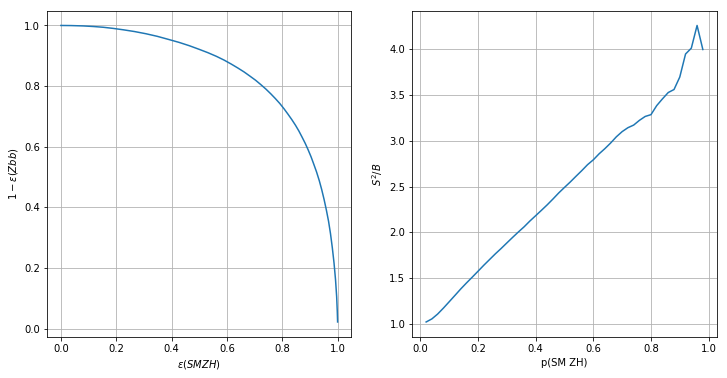

In [96]:
Zbb_probB_sm, SMVh_probB_sm, bins_sm = bkg_reject(Zbb,SMVh,'opt_sm_prob1')

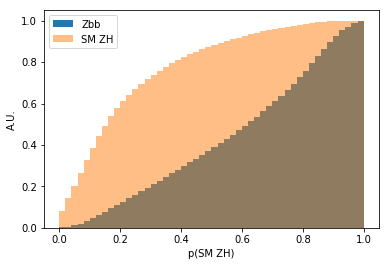

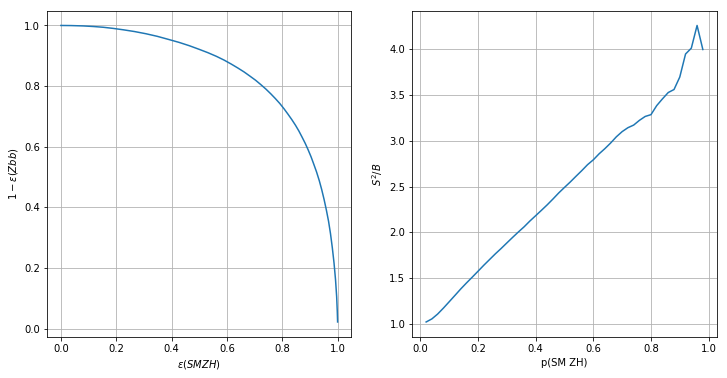

In [97]:
Zbb_probB_bsm1, SMVh_probB_bsm1, bins_bsm1 = bkg_reject(Zbb,SMVh,'opt_bsm1_prob2')

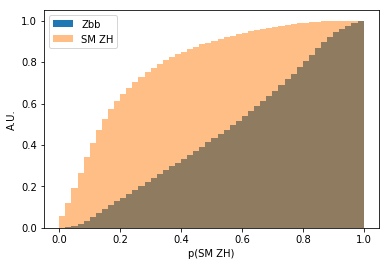

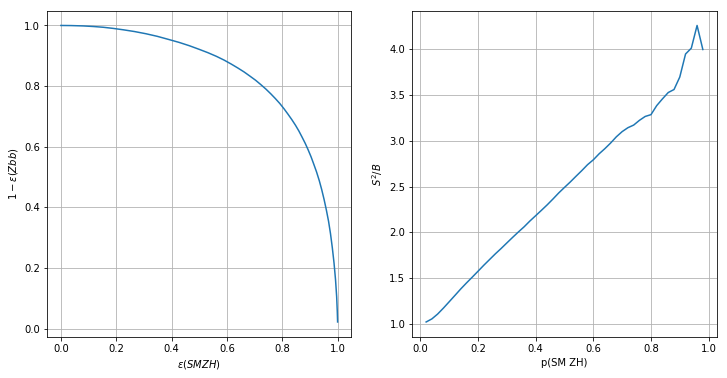

In [98]:
Zbb_probB_bsm2, SMVh_probB_bsm2, bins_bsm2 = bkg_reject(Zbb,SMVh,'opt_bsm2_prob2')

In [128]:
def bsm_analysis(Zbb,SMVh,BSM,bkg_column,bkg_cut,bsm_column,sm_column):
    selZbb = Zbb[ Zbb[bkg_column] < bkg_cut  ]
    selSMVh = SMVh[ SMVh[bkg_column] < bkg_cut  ]
    selBSM = BSM[ BSM[bkg_column] < bkg_cut  ]
    
    plt.hist(selZbb[bsm_column],bins=50,range=[0,1],weights=selZbb.wgt,normed=True,label='Zbb')
    plt.hist(selSMVh[bsm_column],bins=50,range=[0,1],weights=selSMVh.wgt,normed=True,label='SM ZH',alpha=0.5)
    plt.hist(selBSM[bsm_column],bins=50,range=[0,1],weights=selBSM.wgt,normed=True,label='BSM',alpha=0.5)
    
    plt.legend()
    plt.show()

    plt.hist(selZbb[sm_column],bins=50,range=[0,1],weights=selZbb.wgt,normed=True,label='Zbb')
    plt.hist(selSMVh[sm_column],bins=50,range=[0,1],weights=selSMVh.wgt,normed=True,label='SM ZH',alpha=0.5)
    plt.hist(selBSM[sm_column],bins=50,range=[0,1],weights=selBSM.wgt,normed=True,label='BSM',alpha=0.5)
    
    plt.legend()
    plt.show()

    _, bins, _ = plt.hist(selZbb[sm_column]/selZbb[bsm_column],bins=50,weights=selZbb.wgt,normed=True,label='Zbb')
    _, bins, _ = plt.hist(selSMVh[sm_column]/selSMVh[bsm_column],bins=bins,weights=selSMVh.wgt,normed=True,label='SM ZH',alpha=0.5)
    _, bins, _ = plt.hist(selBSM[sm_column]/selBSM[bsm_column],bins=bins,weights=selBSM.wgt,normed=True,label='BSM',alpha=0.5)
    
    plt.legend()
    plt.show()

#     plt.scatter(selZbb[bsm_column],selZbb[sm_column],label='Zbb',color='blue')
#     plt.scatter(selSMVh[bsm_column],selSMVh[sm_column],label='SM ZH',alpha=0.2,color='orange')
#     plt.scatter(selBSM[bsm_column],selBSM[sm_column],label='BSM',alpha=0.2,color='green',style='o')
    
#     plt.legend()
#     plt.show()

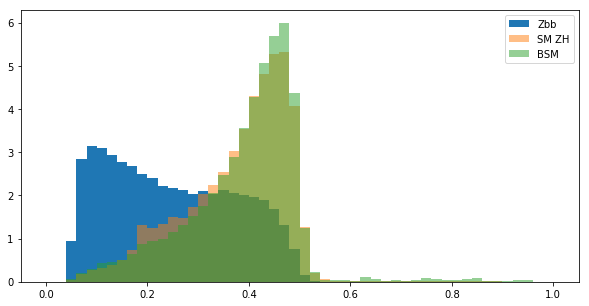

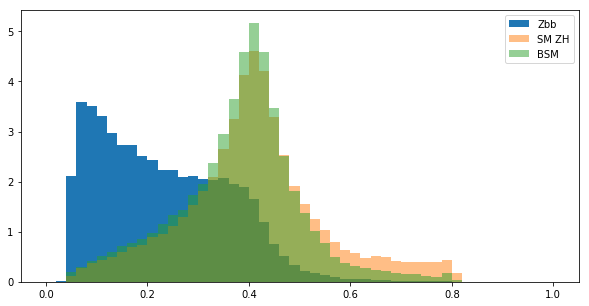

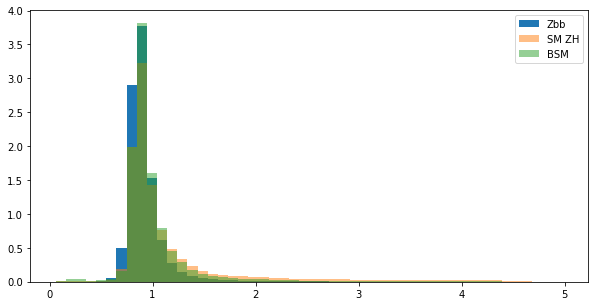

In [129]:
bsm_analysis(Zbb,SMVh,cHWm,'opt_bsm2_prob2',0.9,'opt_bsm2_prob0','opt_bsm2_prob1')

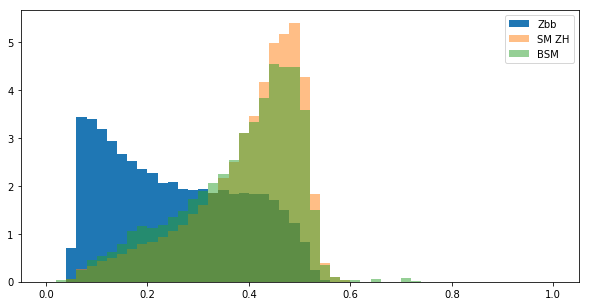

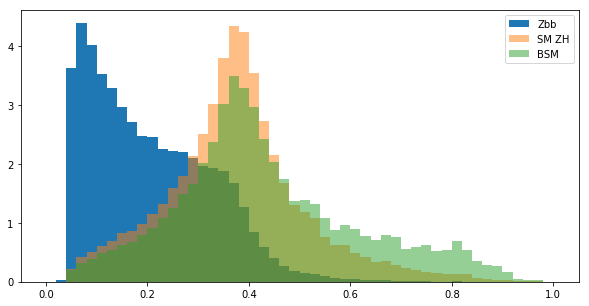

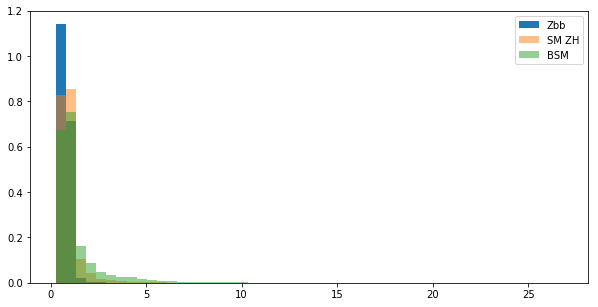

In [131]:
bsm_analysis(Zbb,SMVh,cHWp,'opt_bsm1_prob2',0.9,'opt_bsm1_prob1','opt_bsm1_prob0')